# Homework 1
## Damian Franco
## CS-575

In [4]:
# Importing the required modules
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import time
# from prettytable import PrettyTable
%matplotlib inline

In [29]:
# Saves the current plot to desktop since working in Google Colab
from google.colab import files
#plt.savefig("my_plot.png", bbox_inches='tight', dpi=300)
#files.download("my_plot.png")

## Question 1 - MatVec

In [5]:
# Function to perform matrix-vector multiplication
def mat_vec(local_A, local_b):
    local_x = np.zeros(local_b.shape)
    local_n = len(local_b)

    for i in range(local_n):
      for j in range(local_n):
        local_x[i] += A[i][j] * b[j]
    
    return local_x

In [6]:
simple_A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
simple_b = np.array([1, 2, 3])

In [7]:
print(simple_A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [8]:
print(simple_b)

[1 2 3]


In [9]:
exact = simple_A.dot(simple_b)
#approx = mat_vec(simple_A, simple_b)
print(exact)
#print(approx)

[14 32 50]


In [10]:
#print(exact @ approx)

In [11]:
# This set of N values should generally work well for most machines for Mat-vec
# Changed this to fit more appropiatly with some tests on my machine
N_arr = np.array([160, 320, 640, 1280, 2560]) 
time_list = []
err_list = []
for N in N_arr:
    
    #Generate random vectors and matrices
    A = np.random.rand(N,N)
    b = np.random.rand(N)
    
    
    t_start = time.time()
    x_mine = mat_vec(A,b)
    t_end = time.time()
    
    #Verification
    x_true = A@b
    err_list.append(np.linalg.norm(x_mine - x_true))
    #assert(diff < 1e-12*N)
    
    time_list.append(t_end-t_start)
  

In [12]:
# Create error table with sizes
# Specify the Column Names while initializing the Table
myTable = PrettyTable(["N size", "Runtime Speed (sec)", "Error"])

# Add rows
for i in range(len(N_arr)):
  myTable.add_row([N_arr[i], time_list[i], err_list[i]])

print(myTable)

NameError: name 'PrettyTable' is not defined

In [ ]:
# Plot the runtime results
plt.loglog(N_arr, time_list, label='Runtime with N-sizes')
plt.xlabel('$N$')
plt.ylabel('$Time$')

# Plotting the x^2 asymptotic bound
x_cords = range(160, 2560)
y_cords = [x*x*1e-6 for x in x_cords]
plt.plot(x_cords, y_cords, label='x^2')

plt.legend(loc="upper left")
plt.title('Matrix-Vector Multiplication Runtime Analysis')

plt.savefig("my_plot.png", bbox_inches='tight', dpi=300)
files.download("my_plot.png")
plt.show() 


## Question 2 - MatMat

In [ ]:
# Function to perform matrix-matrix multiplication
def mat_mat(local_A, local_b):
    
    local_x = np.zeros(local_b.shape)
    local_n = len(local_A)

    for i in range(local_n):
      for j in range(local_n):
        for k in range(local_n):
          local_x[i][j] += A[i][k] * b[k][j]
    
    return local_x

In [ ]:
simple_A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
simple_b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

In [ ]:
exact = simple_A.dot(simple_b)
approx = mat_vec(simple_A, simple_b)
print(exact)
print(approx)

In [ ]:
# This set of N values should generally work well for most machines for Mat-vec
# Changed this to fit more appropiatly with some tests on my machine
N_arr = np.array([20, 40, 80, 160, 320]) 
time_list = []
for N in N_arr:
    
    #Generate random vectors and matrices
    A = np.random.rand(N,N)
    b = np.random.rand(N,N)
    
    
    t_start = time.time()
    x_mine = mat_mat(A,b)
    t_end = time.time()
    
    #Verification
    x_true = A@b
    diff = np.linalg.norm(x_mine - x_true)
    #assert(diff < 1e-12*N)
    
    time_list.append(t_end-t_start)
  

In [ ]:
# Create error table with sizes
# Specify the Column Names while initializing the Table
table2 = PrettyTable(["N size", "Runtime Speed (sec)", "Error"])

# Add rows
for i in range(len(N_arr)):
  table2.add_row([N_arr[i], time_list[i], err_list[i]])

print(table2)

NameError: name 'files' is not defined

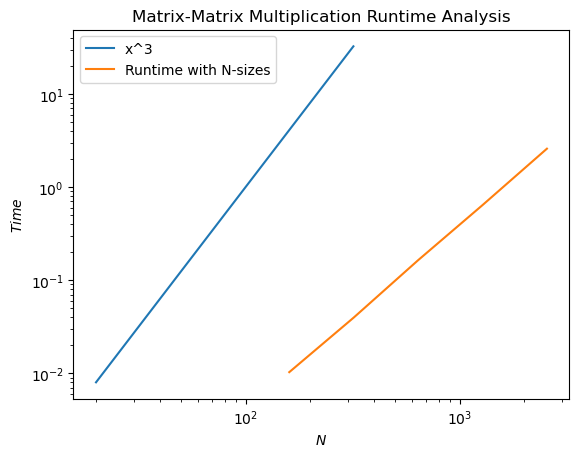

In [13]:
# Plotting the x^3 asymptotic bound
x_cords = range(20, 320)
y_cords = [x*x*x*1e-6 for x in x_cords]
plt.plot(x_cords, y_cords, label='x^3')

# Plot the runtime results
plt.loglog(N_arr, time_list, label='Runtime with N-sizes')
plt.xlabel('$N$')
plt.ylabel('$Time$')

plt.legend(loc="upper left")
plt.title('Matrix-Matrix Multiplication Runtime Analysis')

plt.savefig("my_plot.png", bbox_inches='tight', dpi=300)
files.download("my_plot.png")
plt.show() 
